<a href="https://colab.research.google.com/github/leocassiosilva/Analise-de-dados/blob/main/atividade_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
#from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
from sklearn.datasets import make_regression
from matplotlib import rcParams,animation, rc #outras bibliotecas para gerar animações
rc('animation', html='html5')#para gerar o vídeo


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/analise_dados/dados_atividade.xlsx')


In [4]:
#Selecionar apenas os dados do modelo 1
y=df['Modelo 1']

#remover os dados nulos
y=y.dropna()

In [5]:
#Criar e preencher um array 
x=[]
i=1 
for ele in y:
  x.append(i) 
  i+=1
i  

202

In [15]:
#Reformula os dados usandos array.reshape(-1, 1)se seus dados tiverem um único recurso
y=np.array(y).reshape(-1,1)
x=np.array(x).reshape(-1,1)
y=y.round(2)

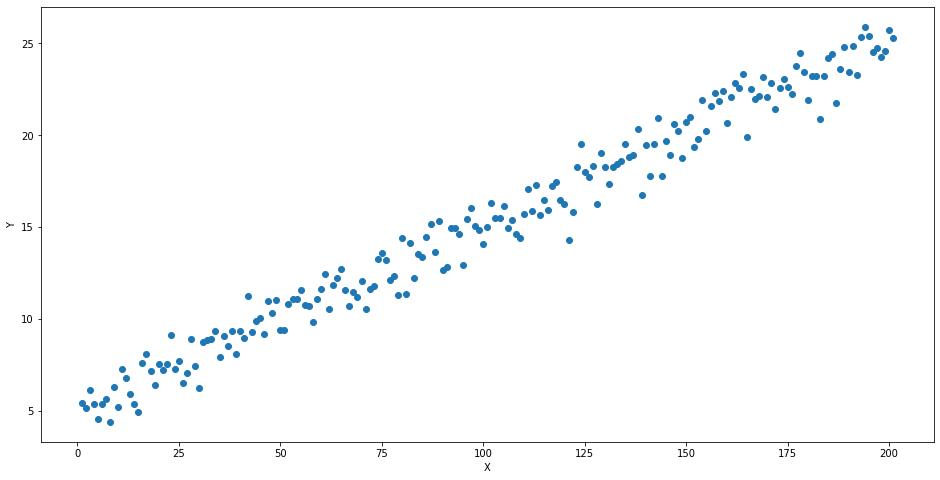

In [ ]:
#Plotando/Gerando o grafico com os dados de Y (dataset/modelo1) e X (quantidade de elementos) 
plt.figure(figsize = (16,8))
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [11]:
#Serve para calcular a linha com o valor atual de a e b com todos os valores de x
def lin(a,b,x):
  return x*a +b

In [12]:
#Calcula e retornaa o erro naquela passada por x
def loss(ypred,y):
  return   ((y-ypred)**2).sum()

In [18]:
def gradient(a,b,x,y,lr):#aqui temos a função principal gradiente
  ypre=lin(a,b,x)#aqui uso a função lin para gerar um y estimado, o y estimado vai ser fruto de uma passada no eixo x com valores atualizados de a e b
  erro=loss(y,ypre)#minha variável erro que vai ser fruto da diferença do meu y real - y estimado ao quadrado tendo e seu somatório de erro1 a erro_n
  e1=(erro*x).mean()#esso erro 1 é multiplicado por x pois na formula original do Professor a = a - lr*e*x, porém se usa-se assim daria erro, pois a não é uma lista, lembrando que no final pego a média do erro, fiz isso pra gerar um número para poder utilizar
  e2=erro.mean()#o erro 2 pego apenas a média dos erros
  a = a - lr*e1 #atualizo a com o meu lr, lr é meu coeficiente de aprendizado 
  b = b + lr*e2 # atualizo b
  #lembrando que é o cálculo que o professor ensinou, fiz algumas adaptações para poder alcançar meus objetivos
  return (a,b) #retorno valores de a e b atualizados, mais próximos dos seus valores verdadeiros

In [19]:
#inicializo os valores de a, b e lr
a=0.19
b=5
lr=0.00000000001 #o professor usa um lr de 0.1, porém se utilizar assim vai estourar a capacidade dos números, então uso ele bem pequeno
fig = plt.figure(dpi =100,figsize=(12,8))
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
line,=plt.plot(x,x*a+b,color="red")
plt.close()
def animate(i):#função animate para gerar a linha de interação na animação
  itera=600 #variação de interação, ela dita quantas vezes vou atualizar meu a e b
  global a,b #chamo a e b para utilizar
  i=0#variável de incrementação 
  while i <itera:
    a,b = gradient(a,b,x,y,lr)#chamando o gradiente e atualizando a,b a cada interação
    i+=1
  return line.set_ydata(x*a+b) #retorno uma linha para plotar na animação 
ani = animation.FuncAnimation(fig, animate, interval=150) #aqui gero uma animação passando uma figura, função animate e um intervalo 
ani     